In [ ]:
# https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

## Moving Average as Feature Engineering

In [6]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('d:/Mubassira/AirPassengers.csv', header=0, index_col=0)


In [7]:
df = DataFrame(series.values)


In [8]:
df.head()

,0
0,112
1,118
2,132
3,129
4,121


In [37]:
df = DataFrame(series.values)
width = 6
lag1 = df.shift(1)
lag2= df.shift(2)
lag3= df.shift(3)
lag4= df.shift(4)
lag5= df.shift(5)
lag6 = df.shift(width - 1)
window = lag6.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1,lag2, lag3,lag4,lag5,lag6,df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1','t+2','t+3','t+4','t+5','t+6']
print(dataframe.head(10))

   mean    t-1    t+1    t+2    t+3    t+4    t+5  t+6
0   NaN    NaN    NaN    NaN    NaN    NaN    NaN  112
1   NaN  112.0    NaN    NaN    NaN    NaN    NaN  118
2   NaN  118.0  112.0    NaN    NaN    NaN    NaN  132
3   NaN  132.0  118.0  112.0    NaN    NaN    NaN  129
4   NaN  129.0  132.0  118.0  112.0    NaN    NaN  121
5   NaN  121.0  129.0  132.0  118.0  112.0  112.0  135
6   NaN  135.0  121.0  129.0  132.0  118.0  118.0  148
7   NaN  148.0  135.0  121.0  129.0  132.0  132.0  148
8   NaN  148.0  148.0  135.0  121.0  129.0  129.0  136
9   NaN  136.0  148.0  148.0  135.0  121.0  121.0  119


In [23]:
######  https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

In [24]:
## Random forest for time series prediction

In [38]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=10000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


In [39]:
 
# load the dataset
series = read_csv('d:/Mubassira/AirPassengers.csv', header=0, index_col=0)
values = series.values


In [40]:
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)

In [41]:
data

array([[112., 118., 132., 129., 121., 135., 148.],
       [118., 132., 129., 121., 135., 148., 148.],
       [132., 129., 121., 135., 148., 148., 136.],
       [129., 121., 135., 148., 148., 136., 119.],
       [121., 135., 148., 148., 136., 119., 104.],
       [135., 148., 148., 136., 119., 104., 118.],
       [148., 148., 136., 119., 104., 118., 115.],
       [148., 136., 119., 104., 118., 115., 126.],
       [136., 119., 104., 118., 115., 126., 141.],
       [119., 104., 118., 115., 126., 141., 135.],
       [104., 118., 115., 126., 141., 135., 125.],
       [118., 115., 126., 141., 135., 125., 149.],
       [115., 126., 141., 135., 125., 149., 170.],
       [126., 141., 135., 125., 149., 170., 170.],
       [141., 135., 125., 149., 170., 170., 158.],
       [135., 125., 149., 170., 170., 158., 133.],
       [125., 149., 170., 170., 158., 133., 114.],
       [149., 170., 170., 158., 133., 114., 140.],
       [170., 170., 158., 133., 114., 140., 145.],
       [170., 158., 133., 114.,

>expected=417.0, predicted=383.9
>expected=391.0, predicted=470.1
>expected=419.0, predicted=378.0
>expected=461.0, predicted=453.9
>expected=472.0, predicted=484.1
>expected=535.0, predicted=500.7
>expected=622.0, predicted=470.9
>expected=606.0, predicted=489.1
>expected=508.0, predicted=551.5
>expected=461.0, predicted=490.7
>expected=390.0, predicted=449.4
>expected=432.0, predicted=376.6
MAE: 55.221


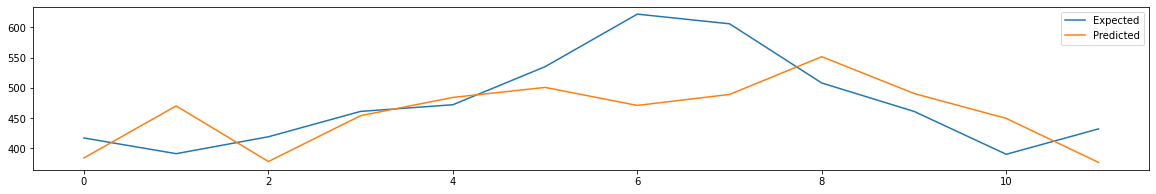

In [42]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, yhat)

4690.245067850833